In [1]:
'''
import csv
import random

def generate_random_csv(filename, width, length):
    with open(filename, mode='w', newline='') as file:
        writer = csv.writer(file)
        for _ in range(length):
            row = [random.randint(0, 100) for _ in range(width)]
            writer.writerow(row)
'''

"\nimport csv\nimport random\n\ndef generate_random_csv(filename, width, length):\n    with open(filename, mode='w', newline='') as file:\n        writer = csv.writer(file)\n        for _ in range(length):\n            row = [random.randint(0, 100) for _ in range(width)]\n            writer.writerow(row)\n"

In [2]:
#generate_random_csv('random_numbers.csv', 256, 256*100)

In [3]:
'''
import os
import shutil

source_folder = 'real_rgb/rgb'
destination_folder = 'fake_therm_set'

# Ensure the destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Get a list of all files in the source folder
all_files = os.listdir(source_folder)

# Filter out only image files (assuming they have common image extensions)
image_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Copy the first 100 images to the destination folder
for image_file in image_files[:100]:
    src_path = os.path.join(source_folder, image_file)
    dst_path = os.path.join(destination_folder, image_file)
    shutil.copy(src_path, dst_path)
'''

"\nimport os\nimport shutil\n\nsource_folder = 'real_rgb/rgb'\ndestination_folder = 'fake_therm_set'\n\n# Ensure the destination folder exists\nos.makedirs(destination_folder, exist_ok=True)\n\n# Get a list of all files in the source folder\nall_files = os.listdir(source_folder)\n\n# Filter out only image files (assuming they have common image extensions)\nimage_files = [f for f in all_files if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]\n\n# Copy the first 100 images to the destination folder\nfor image_file in image_files[:100]:\n    src_path = os.path.join(source_folder, image_file)\n    dst_path = os.path.join(destination_folder, image_file)\n    shutil.copy(src_path, dst_path)\n"

In [4]:
#import dask.dataframe as dd

#def split_dataframe(df,group_size):
#    return [df.iloc[i:i + group_size,:] for i in range(0, len(df), group_size)]

In [5]:
#import dask.dataframe as dd
#import os

# Load a CSV file into a Dask DataFrame
#df = dd.read_csv(os.path.join('fake_therm_set','random_numbers.csv'),blocksize=1000000).compute()


#df.iloc[[0,240],[0:320]].compute()

In [6]:
'''
import pandas as pd
import os

csv_path = 'therm1/thermography.csv'

chunksize = 240

for i, chunk in enumerate(pd.read_csv(csv_path, chunksize=chunksize)):
    chunk.to_csv(os.path.join('therm1','th_{}.csv'.format(i)), index=False)
'''

"\nimport pandas as pd\nimport os\n\ncsv_path = 'therm1/thermography.csv'\n\nchunksize = 240\n\nfor i, chunk in enumerate(pd.read_csv(csv_path, chunksize=chunksize)):\n    chunk.to_csv(os.path.join('therm1','th_{}.csv'.format(i)), index=False)\n"

In [7]:
'''
import os

# load in each csv in the therm1 folder, and replace the first line (comma separated) with (space separated)
for i in range(1, 26882):
    with open(os.path.join('therm1','th_{}.csv'.format(i)), 'r') as file:
        data = file.read().replace(',', ' ')
    with open(os.path.join('therm1','th_{}.csv'.format(i)), 'w') as file:
        file.write(data)
'''

"\nimport os\n\n# load in each csv in the therm1 folder, and replace the first line (comma separated) with (space separated)\nfor i in range(1, 26882):\n    with open(os.path.join('therm1','th_{}.csv'.format(i)), 'r') as file:\n        data = file.read().replace(',', ' ')\n    with open(os.path.join('therm1','th_{}.csv'.format(i)), 'w') as file:\n        file.write(data)\n"

In [8]:
#group_size = 240

#groups = split_dataframe(df, group_size)

#print(groups.size)

In [9]:

'''
import os
import glob

# Function to remove trailing spaces from lines in a CSV file
def remove_trailing_spaces_from_csv(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Strip trailing whitespace from each line
    cleaned_lines = [line.rstrip() + '\n' for line in lines]

    with open(file_path, 'w') as file:
        file.writelines(cleaned_lines)
'''


"\nimport os\nimport glob\n\n# Function to remove trailing spaces from lines in a CSV file\ndef remove_trailing_spaces_from_csv(file_path):\n    with open(file_path, 'r') as file:\n        lines = file.readlines()\n\n    # Strip trailing whitespace from each line\n    cleaned_lines = [line.rstrip() + '\n' for line in lines]\n\n    with open(file_path, 'w') as file:\n        file.writelines(cleaned_lines)\n"

In [10]:
#for file_path in glob.glob('therm1/*.csv'):
#    remove_trailing_spaces_from_csv(file_path)

In [11]:
'''
import os
import pandas as pd
thing = os.path.join('therm1','th_*.csv')

import glob

# Load all CSV files in the therm1 folder
targets = sorted(glob.glob(thing, recursive=True))

global_min = 1000
global_max = -1000

target = pd.read_csv(targets[1], header=None, delimiter=' ').iloc[1:, 20:260]
target
'''

"\nimport os\nimport pandas as pd\nthing = os.path.join('therm1','th_*.csv')\n\nimport glob\n\n# Load all CSV files in the therm1 folder\ntargets = sorted(glob.glob(thing, recursive=True))\n\nglobal_min = 1000\nglobal_max = -1000\n\ntarget = pd.read_csv(targets[1], header=None, delimiter=' ').iloc[1:, 20:260]\ntarget\n"

In [12]:
"""
import os
import glob

# Get a list of all files in the therm1 folder that match the naming convention
file_paths = sorted(glob.glob('therm11/th_*.csv'))

# Iterate through the files and rename them
for file_path in file_paths:
    # Extract the base name of the file (e.g., 'th_0.csv')
    base_name = os.path.basename(file_path)
    
    # Extract the number from the base name and increment it by one
    number = int(base_name.split('_')[1].split('.')[0])
    new_number = number -1
    
    # Create the new file name
    new_base_name = f'th{new_number}.csv'
    new_file_path = os.path.join('therm11', new_base_name)
    
    # Rename the file
    os.rename(file_path, new_file_path)

# now rename them from thNUMBER.csv to th_NUMBER.csv
file_paths = sorted(glob.glob('therm11/th*.csv'))

for file_path in file_paths:
    # Extract the base name of the file (e.g., 'th_0.csv')
    base_name = os.path.basename(file_path)
    
    # Extract the number from the base name and increment it by one
    number = int(base_name.split('th')[1].split('.')[0])
    new_base_name = f'th_{number}.csv'
    new_file_path = os.path.join('therm11', new_base_name)
    
    # Rename the file
    os.rename(file_path, new_file_path)
"""

"\nimport os\nimport glob\n\n# Get a list of all files in the therm1 folder that match the naming convention\nfile_paths = sorted(glob.glob('therm11/th_*.csv'))\n\n# Iterate through the files and rename them\nfor file_path in file_paths:\n    # Extract the base name of the file (e.g., 'th_0.csv')\n    base_name = os.path.basename(file_path)\n    \n    # Extract the number from the base name and increment it by one\n    number = int(base_name.split('_')[1].split('.')[0])\n    new_number = number -1\n    \n    # Create the new file name\n    new_base_name = f'th{new_number}.csv'\n    new_file_path = os.path.join('therm11', new_base_name)\n    \n    # Rename the file\n    os.rename(file_path, new_file_path)\n\n# now rename them from thNUMBER.csv to th_NUMBER.csv\nfile_paths = sorted(glob.glob('therm11/th*.csv'))\n\nfor file_path in file_paths:\n    # Extract the base name of the file (e.g., 'th_0.csv')\n    base_name = os.path.basename(file_path)\n    \n    # Extract the number from the b

In [13]:
# make dataloader for therm11 dataset
from dataset import CSVImageDataset
import torch
import os
from torch.utils.data import DataLoader

device = 'cpu'

scaler = torch.GradScaler(device)

ds = CSVImageDataset(os.path.join('therm11','*.png'), os.path.join('therm11','th_*.csv'))
    
training_set, validation_set = torch.utils.data.random_split(ds, [int(len(ds) * 0.7), len(ds) - int(len(ds) * 0.7)])

train_loader = DataLoader(training_set, batch_size=1, shuffle=True)
val_loader = DataLoader(validation_set, batch_size=1, shuffle=False)



c:\Users\Emma Wadsworth\anaconda3\envs\pixy\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [14]:
print(ds.global_min)
print(ds.global_max)

-6.6
101.9


In [16]:
# get a batch of data
n=0
for x,y,i in train_loader:
    print(i)
    print(train_loader.dataset.dataset.get_filenames(i))
    print(y * (ds.global_max - ds.global_min) + ds.global_min)
    if n == 1:
        break
    n += 1

tensor([18930])
therm11\2840.png
tensor([[[[ 1.6000,  1.6000,  1.5000,  ..., 13.3000, 13.4000, 13.5000],
          [ 2.2000,  1.9000,  1.6000,  ..., 13.4000, 13.5000, 13.4000],
          [ 2.5000,  2.1000,  1.8000,  ..., 13.5000, 13.5000, 13.5000],
          ...,
          [37.4000, 37.4000, 37.4000,  ..., 39.3000, 39.2000, 39.4000],
          [37.6000, 37.5000, 37.5000,  ..., 39.2000, 39.2000, 39.4000],
          [37.5000, 37.5000, 37.6000,  ..., 39.3000, 39.2000, 39.4000]]]])
tensor([14978])
therm11\23479.png
tensor([[[[10.9000, 11.1000, 11.0000,  ..., 15.3000, 15.3000, 15.0000],
          [11.2000, 11.3000, 11.0000,  ..., 15.3000, 15.3000, 15.2000],
          [11.3000, 11.3000, 11.2000,  ..., 15.3000, 15.3000, 15.2000],
          ...,
          [37.2000, 37.1000, 37.0000,  ..., 36.2000, 36.0000, 35.9000],
          [37.0000, 36.9000, 37.1000,  ..., 36.4000, 36.0000, 36.0000],
          [36.9000, 36.8000, 37.0000,  ..., 36.4000, 36.3000, 36.1000]]]])


In [17]:
import pandas as pd

a = pd.read_csv(ds.targets[18930], header=None, delimiter=' ').iloc[1:, 20:260].values.astype('float32')
print(ds.targets[18930])
print(a)

therm11\th_2840.csv
[[ 1.6  1.6  1.5 ... 13.3 13.4 13.5]
 [ 2.2  1.9  1.6 ... 13.4 13.5 13.4]
 [ 2.5  2.1  1.8 ... 13.5 13.5 13.5]
 ...
 [37.4 37.4 37.4 ... 39.3 39.2 39.4]
 [37.6 37.5 37.5 ... 39.2 39.2 39.4]
 [37.5 37.5 37.6 ... 39.3 39.2 39.4]]


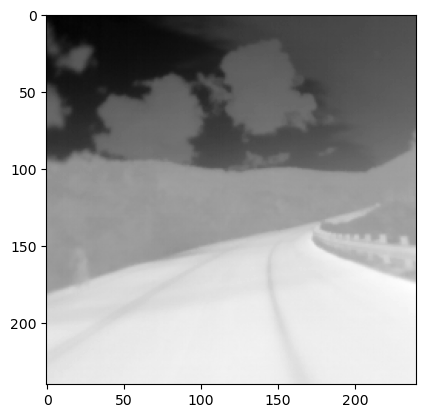

In [18]:
# display a as an image scaled to 0-255
import matplotlib.pyplot as plt
plt.imshow(a, cmap='gray')
plt.show()

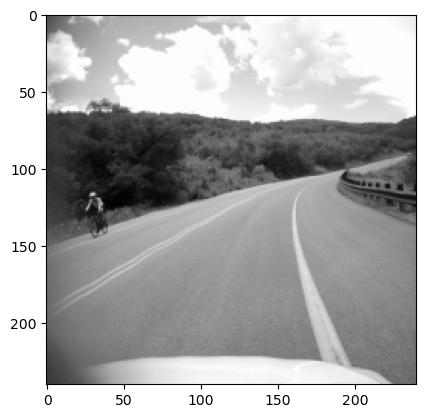

In [20]:
# display image ds.images[18930]
import cv2
b = cv2.imread(ds.images[18930], cv2.IMREAD_GRAYSCALE)
plt.imshow(b, cmap='gray')